## Twitter Sentiment Analysis Using Deep Learning Methods


###1. Twitter Sentiment Analysis Using Neural Networks (NN) Methods
- Explore the implementation of sentiment analysis on Twitter data using NN methods.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# File loading
columns = ["sentiment", "id", "date", "query", "user", "text"]
df  = pd.read_csv('/content/drive/My Drive/SA.csv',header=None, names=columns, encoding="ISO-8859-1")
#df = pd.read_csv("Sentiment140.csv", header=None, names=columns, encoding="ISO-8859-1")

In [ ]:
print(df.shape)

(1048576, 6)


In [ ]:
# Drop unnecessary columns
df.drop(["id", "date", "query", "user"], axis=1, inplace=True)

In [ ]:
# Convert sentiment labels to 0 (negative) or 4 (positive)
df["sentiment"] = df["sentiment"].replace({0: 0, 4: 1})

In [ ]:
# Split dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Preprocessing
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df["text"])
X_train = tokenizer.texts_to_sequences(train_df["text"])
X_test = tokenizer.texts_to_sequences(test_df["text"])
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
y_train = train_df["sentiment"]
y_test = test_df["sentiment"]

In [ ]:
# Define the model
from keras.layers import SimpleRNN
embedding_dim = 100
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(SimpleRNN(128))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Train the model
history= model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.1)

Epoch 1/3
5899/5899 [==============================] - 952s 161ms/step - loss: 0.3717 - accuracy: 0.8405 - val_loss: 0.3420 - val_accuracy: 0.8563
Epoch 2/3
5899/5899 [==============================] - 946s 160ms/step - loss: 0.3352 - accuracy: 0.8579 - val_loss: 0.3348 - val_accuracy: 0.8572
Epoch 3/3
5899/5899 [==============================] - 974s 165ms/step - loss: 0.3193 - accuracy: 0.8648 - val_loss: 0.3395 - val_accuracy: 0.8526


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

6554/6554 [==============================] - 97s 15ms/step - loss: 0.3425 - accuracy: 0.8514
Test Accuracy: 0.8513656854629517


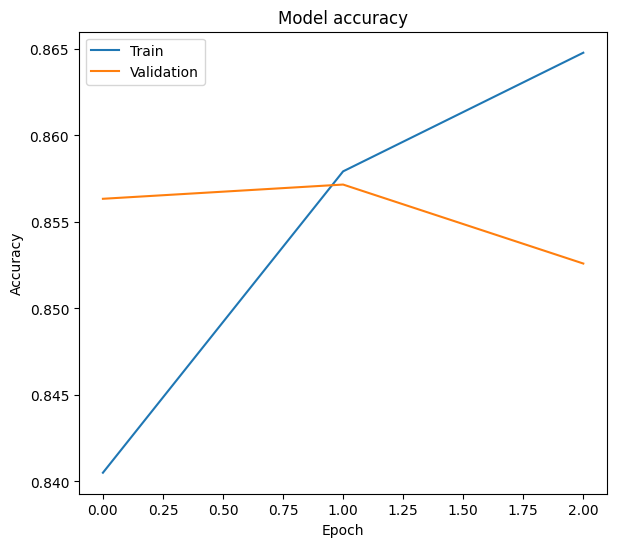

In [ ]:
# Plot training & validation accuracy values
# Plot training history
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

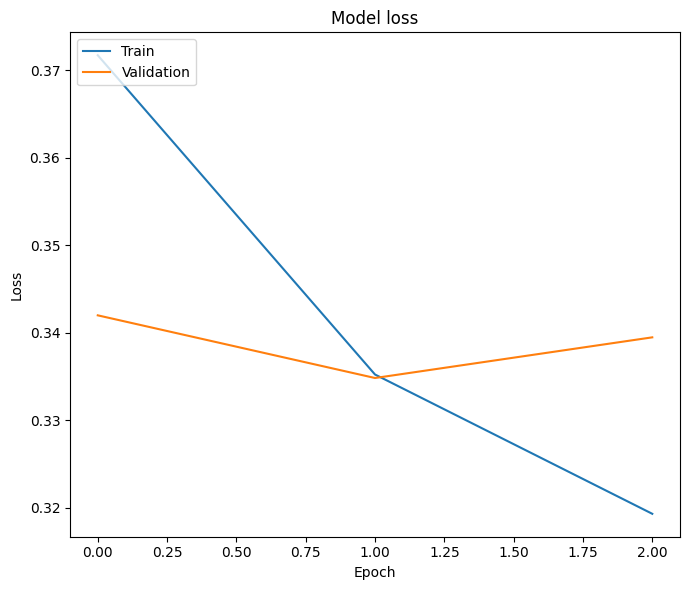

In [ ]:
# Plot training & validation loss values
#plt.subplot(1, 2, 2)
plt.figure(figsize=(7, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print out training and testing accuracies
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy :", test_accuracy)

Training Accuracy: 0.862604022026062
Testing Accuracy : 0.8513656854629517


6554/6554 [==============================] - 96s 15ms/step


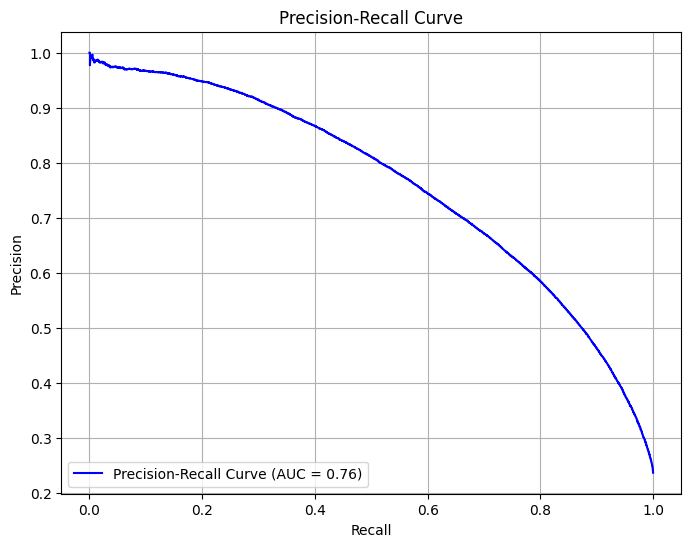

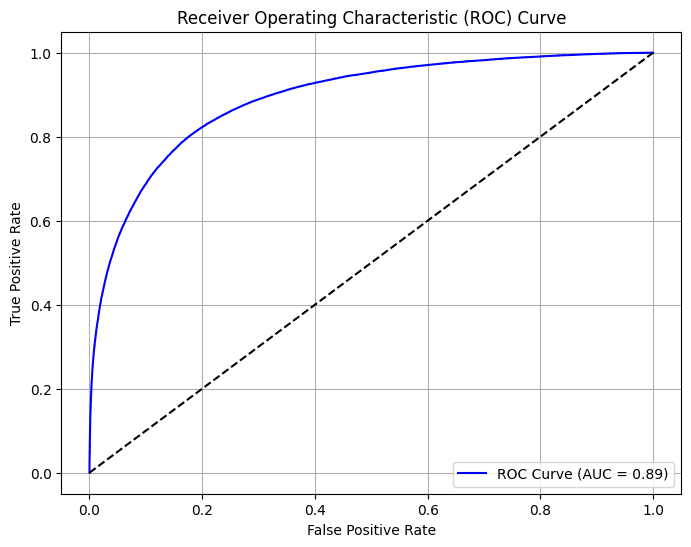

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc
# Predict probabilities for the test set
y_test_pred_prob = model.predict(X_test)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_test_pred_prob)

# Calculate area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve (AUC = %0.2f)' % pr_auc, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)

# Calculate area under the curve (AUC) for ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc, color='b')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import precision_score, f1_score
# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
y_train_pred = model.predict(X_train)
train_precision = precision_score(y_train, y_train_pred.round())
train_f1 = f1_score(y_train, y_train_pred.round())

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
y_test_pred = model.predict(X_test)
test_precision = precision_score(y_test, y_test_pred.round())
test_f1 = f1_score(y_test, y_test_pred.round())

# Print out metrics

print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training F1 Score :", train_f1)
print("Testing Accuracy :", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing F1 Score :", test_f1)


6554/6554 [==============================] - 101s 15ms/step
Training Accuracy: 0.862604022026062
Training Precision: 0.8667875697602089
Training F1 Score : 0.631920492578115
Testing Accuracy : 0.8513656854629517
Testing Precision: 0.8302137119908204
Testing F1 Score : 0.5976741484569613
